In [5]:
pip install yfinance


  Using cached yfinance-0.2.55-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.9-cp312-cp312-macosx_11_0_arm64.whl
Using cached yfinance-0.2.55-py2.py3-none-any.whl (109 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [54]:
sp500 = yf.download('^GSPC', start='1927-01-01', end='2024-12-31', progress=False)
# print(sp500.tail())
sp500_daily_returns=sp500['Close'].pct_change()*100
print(sp500_daily_returns.tail())


Ticker         ^GSPC
Date                
2024-12-23  0.728727
2024-12-24  1.104276
2024-12-26 -0.040566
2024-12-27 -1.105574
2024-12-30 -1.070200


In [58]:
mean_daily_return=sp500_daily_returns.mean()
std_daily_return=sp500_daily_returns.std()

print(f"Mean of daily returns: {mean_daily_return:}%")
print(f"Standard deviation of daily returns: {std_daily_return:}%")

Mean of daily returns: Ticker
^GSPC    0.030993
dtype: float64%
Standard deviation of daily returns: Ticker
^GSPC    1.193248
dtype: float64%


Text(0, 0.5, 'frequency')

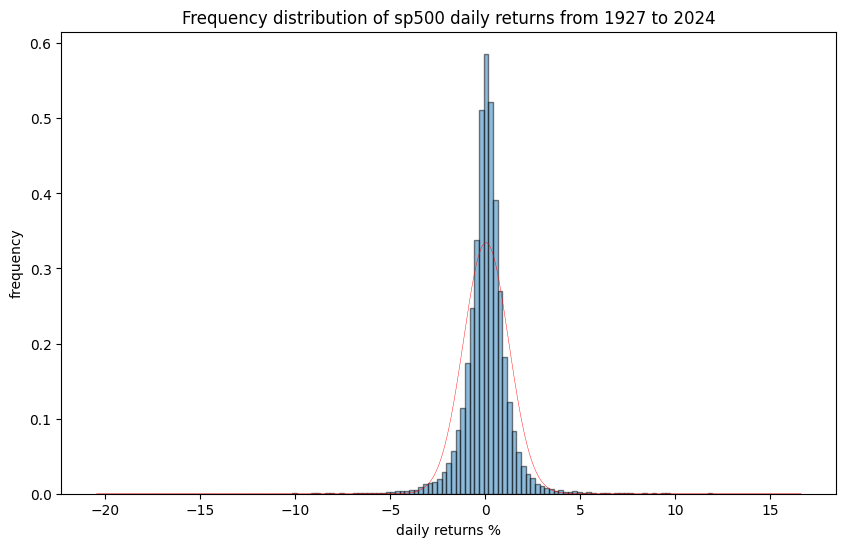

In [70]:
plt.figure(figsize=(10,6))
plt.hist(sp500_daily_returns['^GSPC'], bins=151, edgecolor='black', density = True, alpha=0.5, label='Empirical')
x=np.linspace(sp500_daily_returns.min(), sp500_daily_returns.max(), 1000)
y=stats.norm.pdf(x,mean_daily_return, std_daily_return) 
plt.plot(x, y, '-r', lw = 0.3, label='Normal fit') 
plt.title('Frequency distribution of sp500 daily returns from 1927 to 2024')
plt.xlabel('daily returns %')
plt.ylabel('frequency')

In [76]:
sp500_daily_returns_sorted = sp500_daily_returns.sort_values(by = ['^GSPC'], ascending=True)
print(sp500_daily_returns_sorted.head())

Ticker          ^GSPC
Date                 
1987-10-19 -20.466931
1929-10-28 -12.940279
2020-03-16 -11.984055
1929-10-29 -10.158309
1935-04-16  -9.967139


In [80]:
import scipy.stats as stats
z = 17
prob = stats.norm.sf(z)
print(prob)

4.105996202098789e-65
